# Run LetterSpace model

This notebook shows how to run the `LetterSpace` model to create a `LetterLedger`. After running a model for a given number of steps, the ledger contains all send letters with information of sender, recipient, their geographical positions, the "topic" of the letter and the timestamp at which this letter was sent. 

In [1]:
from scicom.letters.letters.model import LetterSpace
import pandas as pd

In [2]:
model = LetterSpace()

In [3]:
%%time
model.run(100)

CPU times: user 4.11 s, sys: 3.15 ms, total: 4.11 s
Wall time: 4.11 s


In [4]:
letterLedger = pd.DataFrame(
    model.letterLedger,
    columns=['sender', 'recipient', 'sender_loc', 'recipient_loc', 'topic', 'step']
)

In [5]:
letterLedger.head(2)

sender  recipient                               sender_loc  \
0      88          7   [257.7470635480816, 160.0618113713992]   
1      83         40  [51.21148275853455, 142.85158759961675]   

                              recipient_loc  \
0  [286.00912558948636, 159.42026787920452]   
1    [66.86101085383312, 160.9605503099568]   

                                               topic  step  
0  [0.10895246038802127, 0.390500363934874, 0.502...     0  
1  [0.7589863157938985, 0.14309343435332428, 0.45...     0

In [6]:
letterLedger.shape

(8977, 6)

In [7]:
letterLedger.to_csv('./letterLedger_run1.csv')

## Considering individual agents

Each agent in the model can be accessed individually. The agents keep track of their personal topic evolution in the `topicLedger`.

In [8]:
agents = model.schedule.agents

In [9]:
a1 = agents[0]

In [10]:
a1.topicLedger[:3]

[array([0.48258089, 0.96995034, 0.58993466]),
 array([0.48174404, 0.96405752, 0.59375686]),
 array([0.48097784, 0.9586622 , 0.59725636])]

## Visualize letter network

Each sending of a letter creates an edge in the social network of the model. This network can be used to visualize the final state of the letter network. 

In [11]:
import networkx as nx

In [12]:
graph = model.G

In [13]:
sizes = nx.get_node_attributes(graph, 'numLettersReceived')

In [14]:
pos = nx.spring_layout(graph)

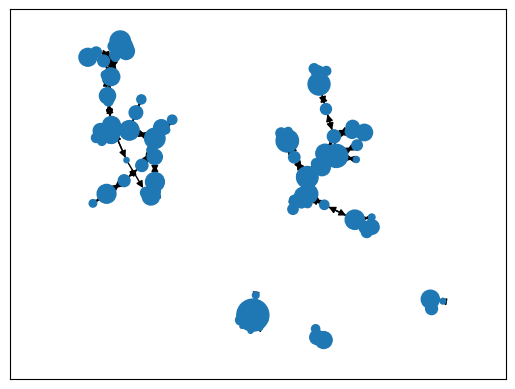

In [15]:
nx.draw_networkx(graph, pos=pos, node_size=list(sizes.values()), with_labels=False)

## Pruning

A first simple approach of pruning is removing nodes with lesser numbers of received letters.

In [16]:
len(graph.nodes())

100

In [17]:
lesserNodes = [x for x,y in sizes.items() if y < 100]

In [18]:
graph2 = graph.copy()

In [19]:
graph2.remove_nodes_from(lesserNodes)

In [20]:
sizes2 = nx.get_node_attributes(graph2, 'numLettersReceived')
pos2 = nx.spring_layout(graph2)

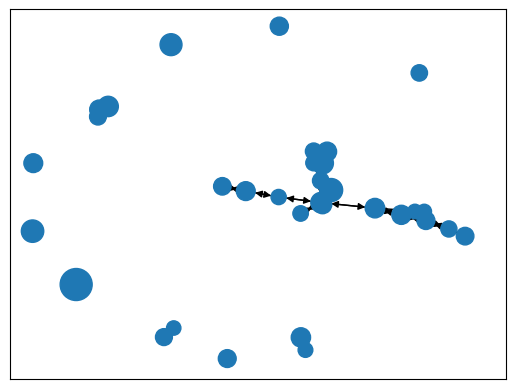

In [21]:
nx.draw_networkx(graph2,pos=pos2, node_size=list(sizes2.values()), with_labels=False)